# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import random as ra
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def dice(mini,maxi,n):   
    dice_results = []
    index = []
    column_name = ['value']
    for i in range(mini,n+1):   
        result = ra.randint(mini,maxi)
        dice_results.append(result)
        index.append(i)
        
    results_df = pd.DataFrame(dice_results, columns = column_name,  index = index)
    return results_df


In [16]:
results = dice(1,6,10)

#### 2.- Plot the results sorted by value.

AxesSubplot(0.125,0.125;0.775x0.755)


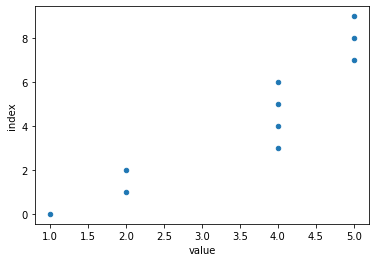

In [17]:

result_sort2 = results.sort_values(by='value').reset_index(drop=True)
result_sort2 = result_sort2.reset_index()
print(result_sort2.plot.scatter(x='value', y='index'))

   round  value
0      3      1
1      4      2
2      5      2
3      1      4
4      7      4
5      8      4
6      9      4
7      2      5
8      6      5
9     10      5
AxesSubplot(0.125,0.125;0.775x0.755)


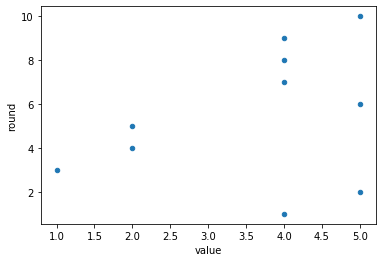

In [18]:
# your code here

results_sort = results.sort_values(by='value').reset_index(drop=False).rename(columns = {'index': 'round'})
print(results_sort)
print(results_sort.plot.scatter(x='value', y='round'))

**3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.**

In [19]:
# your code here

freq_table = results_sort.groupby(['value']).count().rename(columns = {'round': 'freq'}).reset_index(drop=False)
freq_table

,value,freq
0,1,1
1,2,2
2,4,4
3,5,3


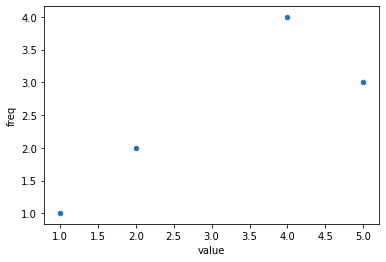

In [20]:
freq_table.plot.scatter(x = 'value', y='freq')

In [21]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [22]:
# your code here

def mean_calc(df,col_name):
    values_lst = df[f"{col_name}"].tolist()
    mean = sum(values_lst) / len(values_lst)
    return mean

In [23]:
mean_calc(results,col_name='value')

3.6

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [24]:
# your code here
freq_table = results_sort.groupby(['value']).count().rename(columns = {'round': 'freq'}).reset_index(drop=False)

mean_freq_dist = mean_calc(freq_table,col_name='freq')

print(f"The freq dist mean is {mean_freq_dist}")

The freq dist mean is 2.5


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [25]:
# your code here

def median_calc(df,col_name):
    
    values_lst = df[f"{col_name}"].tolist()
    values_lst.sort()
    lenght = len(values_lst)

    if lenght % 2 == 0: 
        median_values = values_lst[(lenght//2) -1:(lenght// 2) + 1]
        median = sum(median_values) // 2
        return median
    
    else:
        median = values_lst[(lenght // 2)]
        return median


In [26]:
median_calc(results,col_name='value')

4

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [33]:
# your code here
def quart_calc(df,col_name):
    
    values_lst = df[f"{col_name}"].tolist()
    values_lst.sort()
    
    MEDIAN = median_calc(df,col_name=col_name)
    Q4 = max(values_lst)
    lenght = len(values_lst)

    if lenght % 2 == 0: 
        lst_q1 = values_lst[:(lenght//2)]
        Q1=  lst_q1[(len(lst_q1) // 2)]
        
        lst_q3 = values_lst[(lenght//2):]
        Q3=  lst_q3[(len(lst_q3) // 2)]
        
    else:
        lst_q1 = values_lst[:MEDIAN+1]
        Q1 = lst_q1[(len(lst_q1) // 2)-1 : (len(lst_q1)// 2) + 1]
        Q1 = sum(Q1) // 2
        
        lst_q3 = values_lst[MEDIAN:]
        Q3 = lst_q3[(len(lst_q3) // 2)-1 : (len(lst_q3)// 2) + 1]
        Q3 = sum(Q3) // 2

    return print(f"Q1={Q1}\nQ2={MEDIAN}\nQ3={Q3}\nQ4={Q4}")

    


In [34]:
quart_calc(results,col_name='value')

Q1=2
Q2=4
Q3=5
Q4=5


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

   roll  value
0     0      1
1     1      2
2     2      6
3     3      1
4     4      6
AxesSubplot(0.125,0.125;0.775x0.755)


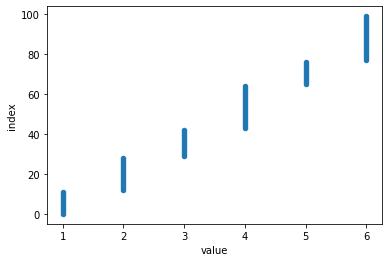

In [35]:
# your code here
dice = pd.read_csv('../data/roll_the_dice_hundred.csv')

dice = dice.drop('Unnamed: 0', axis =1)
print(dice.head())


dice_sort = dice.sort_values(by='value').reset_index(drop=True)
dice_sort = dice_sort.reset_index()
print(dice_sort.plot.scatter(x='value', y='index'))

In [ ]:
"""
your comments here
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [36]:
# your code here

print(f"The mean is = {mean_calc(dice, col_name='value')}")

The mean is = 3.74


#### 3.- Now, calculate the frequency distribution.


In [37]:
# your code here

freq = dice_sort.groupby(['value']).count().rename(columns = {'roll': 'freq'}).\
    drop('index', axis=1).reset_index(drop=False)

freq

,value,freq
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

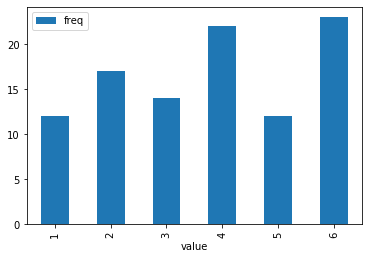

In [38]:
# your code here
freq.plot(x= 'value' , y='freq', kind='bar')

In [ ]:
"""
your comments here

Even thou the probabilities of getting each number of a dice is 1/6, in this scenario we dont have enough throws
to see the uniform distribution to the fullest. By the law of large numbers, if we continue doing this experiment
long enought we will be able to see that each value probability is the same and the frequency should be almost 
the same for each one of them. 
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

AxesSubplot(0.125,0.125;0.775x0.755)


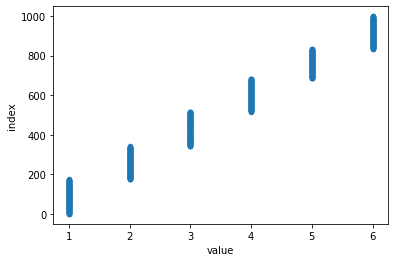

In [39]:
# your code here
# your code here
dice = pd.read_csv('../data/roll_the_dice_thousand.csv')

dice = dice.drop('Unnamed: 0', axis =1)

dice_sort = dice.sort_values(by='value').reset_index(drop=True)
dice_sort = dice_sort.reset_index()
print(dice_sort.plot.scatter(x='value', y='index'))

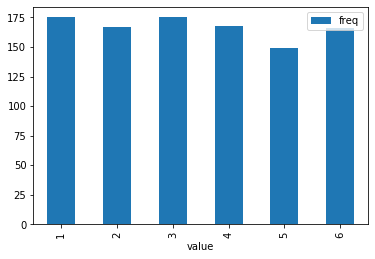

In [40]:
freq = dice_sort.groupby(['value']).count().rename(columns = {'roll': 'freq'}).\
    drop('index', axis=1).reset_index(drop=False)

freq.plot(x= 'value' , y='freq', kind='bar')


In [ ]:
"""
your comments here

As the number of trials increased, we are getting closer to see the theoretical distribution which in this case
is a uniform distribution. 
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [41]:
# your code here
ages = pd.read_csv('../data/ages_population.csv')
ages.head()



,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


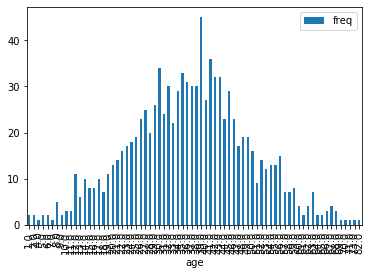

In [42]:
freq = ages.reset_index().groupby(by='observation').count().reset_index()

freq.columns = ['age', 'freq']

freq.head()

freq.plot(x= 'age' , y='freq', kind='bar')


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [48]:
import math

def std_cal(df,col_name):
    values_lst = df[f"{col_name}"].tolist()
    MEAN = mean_calc(df,col_name)
    variance = 0

    for i in values_lst:
        num = ((i - MEAN) ** 2) / (len(values_lst) -1)
        variance += num
    
    std = math.sqrt(variance)
    return std
    

In [49]:
# your code here
mean_calc(ages, col_name='observation')



36.56

In [50]:
std_cal(ages,col_name='observation')

12.81649962597677

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

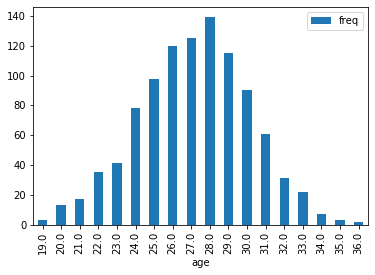

In [44]:
# your code here
ages2 = pd.read_csv('../data/ages_population2.csv')

freq = ages2.reset_index().groupby(by='observation').count().reset_index()
freq.columns = ['age', 'freq']
freq.plot(x= 'age' , y='freq', kind='bar')


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here

In this case we can see how the range is lower than in step 1, from 39 to 19 years old, so just a range of 20.
Additionally, we have more people with ages in the range between 26 and 30, 
achieving up to 140 peoples with the age 28.

From just a visual analysis, we can infer that the mean is approx. between 27 and 28 and median is also close
to that range since the distribution is closer to a normal distribution. 

"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [45]:
# your code here
mean_calc(ages2, col_name='observation')

27.155

In [53]:
std_cal(ages2, col_name='observation')

2.9698139326891915

In [ ]:
"""
your comments here

From step 2 we can see how the values are more spread around the mean as the range is significantly bigger than
in the ages 2 table, making the mean bigger in term of age. 

In the ages 2 table, the values are more close to the mean making the standard deviation very small. As mentioned
before, most of the values are around the range 26 to 32. 

"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

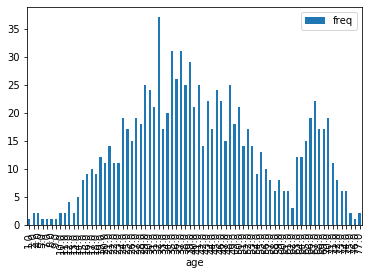

In [56]:
# your code here

ages3 = pd.read_csv('../data/ages_population3.csv')

freq = ages3.reset_index().groupby(by='observation').count().reset_index()
freq.columns = ['age', 'freq']
freq.plot(x= 'age' , y='freq', kind='bar')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [57]:
# your code here
mean_calc(ages3,  col_name='observation')

41.989

In [58]:
std_cal(ages3,  col_name='observation')

16.14470595986592

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [59]:
# your code here

quart_calc(ages3,col_name='observation')

Q1=30.0
Q2=40.0
Q3=53.0
Q4=77.0


In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""